In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import cv2
import os
import glob
import shutil
import warnings
import random
from tensorflow import keras
from pathlib import Path
from keras import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, GlobalAveragePooling2D, Reshape, MaxPooling2D, LSTM, Activation, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import Adam,RMSprop
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from keras import optimizers
from keras.regularizers import l2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import KFold
from keras import datasets, layers, models
from keras.applications import EfficientNetB0
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential, Model
from keras import backend as K
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation, Reshape, LSTM, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionResNetV2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNet
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/paddy leaf/Rice.zip', 'r')
zip_ref.extractall('/content/Paddy_Disease')
zip_ref.close()

In [ ]:
# rb="/content/Paddy_Disease/Rice/Rice___Brown_Spot"
# rh='/content/Paddy_Disease/Rice/Rice___Healthy'
# rl='/content/Paddy_Disease/Rice/Rice___Leaf_Blast'
# rn='/content/Paddy_Disease/Rice/Rice___Neck_Blast'

In [ ]:
# folder_path = rb
# file_count = 0
# for file_name in os.listdir(folder_path):
#   if os.path.isfile(os.path.join(folder_path,file_name)):
#     file_count +=1
# print(f'Number of Rice_Brown files: {file_count}')

Number of Rice_Brown files: 613


In [ ]:
# folder_path = rh
# file_count = 0
# for file_name in os.listdir(folder_path):
#   if os.path.isfile(os.path.join(folder_path,file_name)):
#     file_count +=1
# print(f'Number of Rice_Healthy files: {file_count}')

Number of Rice_Healthy files: 1488


In [ ]:
# folder_path = rl
# file_count = 0
# for file_name in os.listdir(folder_path):
#   if os.path.isfile(os.path.join(folder_path,file_name)):
#     file_count +=1
# print(f'Number of Rice_Leaf_Blast files: {file_count}')

Number of Rice_Leaf_Blast files: 977


In [ ]:
# folder_path = rn
# file_count = 0
# for file_name in os.listdir(folder_path):
#   if os.path.isfile(os.path.join(folder_path,file_name)):
#     file_count +=1
# print(f'Number of Rice_Neck_Blast files: {file_count}')

Number of Rice_Neck_Blast files: 1000


In [ ]:
# def generate_df(image_dir,label):
#   filepaths = pd.Series(list(image_dir.glob(r'*.jpg')),name='Filepath').astype(str)
#   labels=pd.Series(label,name='Label',index=filepaths.index)
#   df=pd.concat([filepaths,labels],axis=1)
#   return df

In [ ]:
# rb_df = generate_df(rb, label="Brown_Spot")
# rh_df = generate_df(rh, label="Healthy")
# rl_df = generate_df(rl, label="Leaf_Blast")
# rn_df = generate_df(rn, label="Neck_Blast")

# train_df = pd.concat([rb_df, rh_df, rl_df, rn_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
# train_df

AttributeError: ignored

In [ ]:
directory = '/content/Paddy_Disease/Rice'
destination = '/content/Paddy/train_data'

if not os.path.exists(destination):
    os.makedirs(destination)

for subdir in os.listdir(directory):
    subdirectory = os.path.join(directory, subdir)
    if os.path.isdir(subdirectory):
        subdir_destination = os.path.join(destination, subdir)
        if not os.path.exists(subdir_destination):
            os.makedirs(subdir_destination)
        i = 1
        for file in os.listdir(subdirectory):
            filename, extension = os.path.splitext(file)
            new_name = f'{subdir}_{i:02d}{extension}'
            shutil.copy(os.path.join(subdirectory, file), os.path.join(subdir_destination, new_name))
            i += 1

In [ ]:
directory = '/content/Potato_Disease/train_data'
num_files = 0
for root, dirs, files in os.walk(directory):
    num_files += len(files)

print(f'The number of files in all subdirectories is {num_files}.')

The number of files in all subdirectories is 4078.


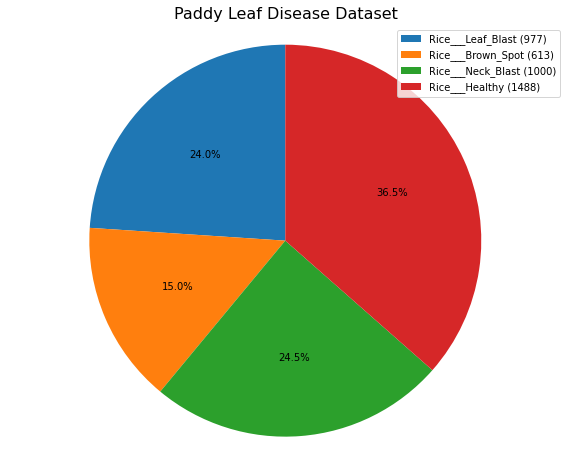

In [ ]:
directory = '/content/Paddy/train_data'
sub_dirs = os.listdir(directory)

labels = []
sizes = []
for sub_dir in sub_dirs:
    sub_dir_path = os.path.join(directory, sub_dir)
    num_files = len(os.listdir(sub_dir_path))
    sizes.append(num_files)
    labels.append(f'{sub_dir} ({num_files})')

fig, ax = plt.subplots(figsize=(10, 8))
#ax.pie(sizes, labels=labels, startangle=90)
ax.pie(sizes, labels=['']*len(labels), startangle=90, labeldistance=None, autopct='%1.1f%%')
ax.set_title("Paddy Leaf Disease Dataset", fontsize=16)
ax.legend(labels, loc='best')
ax.axis('equal')
plt.show()

In [ ]:
data_dir = '/content/Paddy/train_data'

classes = ['Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Healthy', 'Rice___Neck_Blast']
class_labels = ['Brown_Spot', 'Rice_Healthy', 'Rice_Leaf_Blast', 'Rice_Neck_Blast']
data = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    file_names = os.listdir(class_dir)
    for file_name in file_names:
        file_path = os.path.join(class_dir, file_name)
        label = class_labels[i]
        data.append((file_path, label))

df = pd.DataFrame(data, columns=['image_path', 'label'])

df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,image_path,label
0,/content/Paddy/train_data/Rice___Healthy/Rice_...,Rice_Leaf_Blast
1,/content/Paddy/train_data/Rice___Healthy/Rice_...,Rice_Healthy
2,/content/Paddy/train_data/Rice___Neck_Blast/Ri...,Rice_Neck_Blast
3,/content/Paddy/train_data/Rice___Healthy/Rice_...,Rice_Healthy
4,/content/Paddy/train_data/Rice___Brown_Spot/Ri...,Brown_Spot
...,...,...
4584,/content/Paddy/train_data/Rice___Healthy/Rice_...,Rice_Leaf_Blast
4585,/content/Paddy/train_data/Rice___Neck_Blast/Ri...,Rice_Neck_Blast
4586,/content/Paddy/train_data/Rice___Healthy/Rice_...,Rice_Leaf_Blast
4587,/content/Paddy/train_data/Rice___Brown_Spot/Ri...,Brown_Spot


In [ ]:
print(df['label'].value_counts())

Rice_Leaf_Blast    1488
Rice_Healthy       1488
Rice_Neck_Blast    1000
Brown_Spot          613
Name: label, dtype: int64


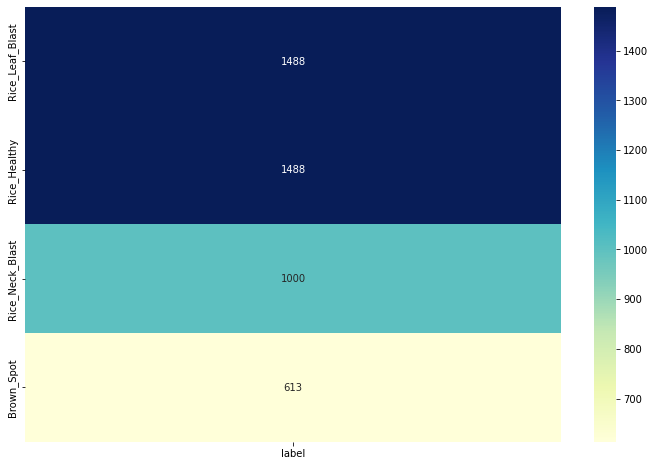

In [ ]:
plt.figure(figsize=(12, 8))
counts = df['label'].value_counts()

sns.heatmap(pd.DataFrame(counts), annot=True, cmap='YlGnBu', fmt='g')
plt.show()

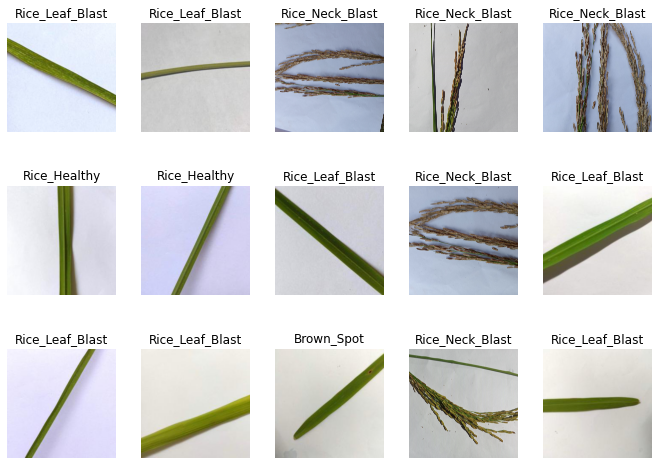

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(12,8))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(15):
    idx = random.randint(0, len(df))
    img_path = df.iloc[idx]['image_path']
    label = df.iloc[idx]['label']
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(label)
    axs[i].axis('off')

plt.show()


train set shape: (2248, 2)
test set shape: (964, 2)
validation set shape: (1377, 2)




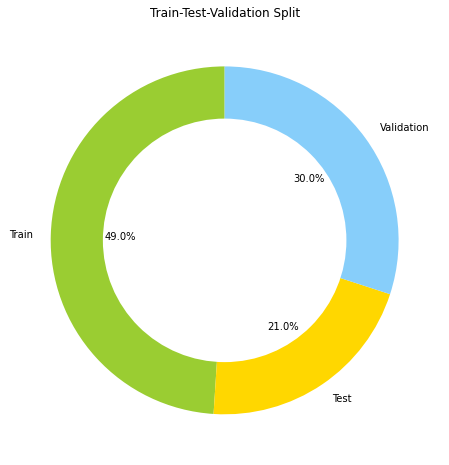

In [ ]:
train, valid = train_test_split(df, train_size=0.70, random_state=0)
train_new, test = train_test_split(train, train_size=0.70, random_state=0)

print(f"train set shape: {train_new.shape}")
print(f"test set shape: {test.shape}")
print(f"validation set shape: {valid.shape}")
print("\n")

plt.figure(figsize=(12, 8))
sizes = [train_new.shape[0], test.shape[0], valid.shape[0]]
labels = ['Train', 'Test', 'Validation']
colors = ['yellowgreen', 'gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# add title
plt.title('Train-Test-Validation Split')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(train_new,
                                              x_col = 'image_path', y_col ='label',
                                              target_size = (224,224), batch_size = 32, 
                                              class_mode = 'categorical', shuffle = True, seed=42, color_mode='rgb')
val_gen = train_datagen.flow_from_dataframe(valid,
                                            target_size=(224,224), x_col = 'image_path', y_col ='label', 
                                            class_mode='categorical',
                                            batch_size= 32, shuffle=True, seed=42, color_mode='rgb')
test_gen = test_datagen.flow_from_dataframe(test,
                                            target_size = (224,224), x_col = 'image_path', y_col ='label',
                                             class_mode = 'categorical',
                                            batch_size = 32, shuffle = False, seed=42, color_mode='rgb')

Found 2248 validated image filenames belonging to 4 classes.
Found 1377 validated image filenames belonging to 4 classes.
Found 964 validated image filenames belonging to 4 classes.


In [ ]:
df.shape

(4589, 2)

In [ ]:
class_names = df['label'].unique()
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

print(f'Class names: {class_names}')
print(f'Class indices: {class_indices}')

Class names: ['Rice_Leaf_Blast' 'Rice_Healthy' 'Rice_Neck_Blast' 'Brown_Spot']
Class indices: {'Rice_Leaf_Blast': 0, 'Rice_Healthy': 1, 'Rice_Neck_Blast': 2, 'Brown_Spot': 3}


In [ ]:
total_samples = len(train_gen.filenames)
batch_size = train_gen.batch_size
epoch_steps = total_samples // batch_size
epoch_steps

70

In [ ]:
input_shape = (224, 224, 3)
input_data = Input(shape=input_shape)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

x = base_model(input_data)
x = Dense(128, activation='relu')(x)
#x = Dropout(0.1)(x) 
x = Dense(64, activation='relu')(x)
#x = Dropout(0.1)(x)
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=input_data, outputs=predictions)

model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 7, 7, 128)         131200    
                                                                 
 dense_1 (Dense)             (None, 7, 7, 64)          8256      
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                              

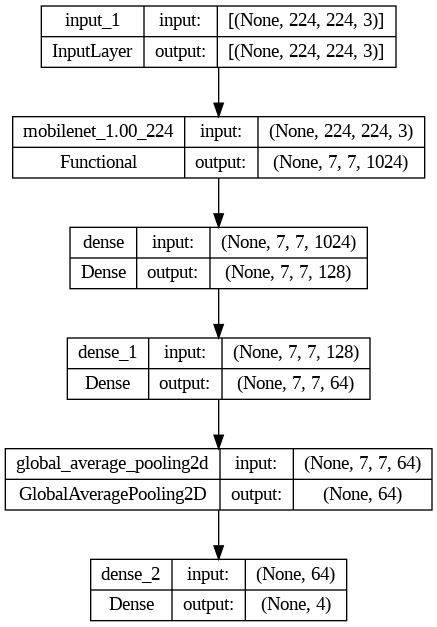

In [ ]:
from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(train_gen, epochs=10, batch_size=32, validation_data=val_gen, callbacks=[Checkpoint_Model,Early_Stopper])

Epoch 1/10
71/71 [==============================] - 206s 3s/step - loss: 0.7754 - accuracy: 0.5730 - auc: 0.8755 - val_loss: 0.7114 - val_accuracy: 0.5977 - val_auc: 0.8886
Epoch 2/10
71/71 [==============================] - 171s 2s/step - loss: 0.6778 - accuracy: 0.6041 - auc: 0.8946 - val_loss: 0.6788 - val_accuracy: 0.5882 - val_auc: 0.8929
Epoch 3/10
71/71 [==============================] - 170s 2s/step - loss: 0.6599 - accuracy: 0.6112 - auc: 0.9008 - val_loss: 0.6846 - val_accuracy: 0.5984 - val_auc: 0.8932
Epoch 4/10
71/71 [==============================] - 171s 2s/step - loss: 0.6452 - accuracy: 0.6268 - auc: 0.9029 - val_loss: 0.6689 - val_accuracy: 0.6224 - val_auc: 0.8977
Epoch 5/10
71/71 [==============================] - 168s 2s/step - loss: 0.6326 - accuracy: 0.6352 - auc: 0.9079 - val_loss: 0.6718 - val_accuracy: 0.6224 - val_auc: 0.8985
Epoch 6/10
71/71 [==============================] - 173s 2s/step - loss: 0.6293 - accuracy: 0.6312 - auc: 0.9062 - val_loss: 0.6622 - v

In [ ]:
model.save("Model_Last_Pred.h5")

In [ ]:
model.evaluate(test_gen)

31/31 [==============================] - 34s 1s/step - loss: 0.6159 - accuracy: 0.6297 - auc: 0.9060


[0.6159046292304993, 0.6296680569648743, 0.9059508442878723]

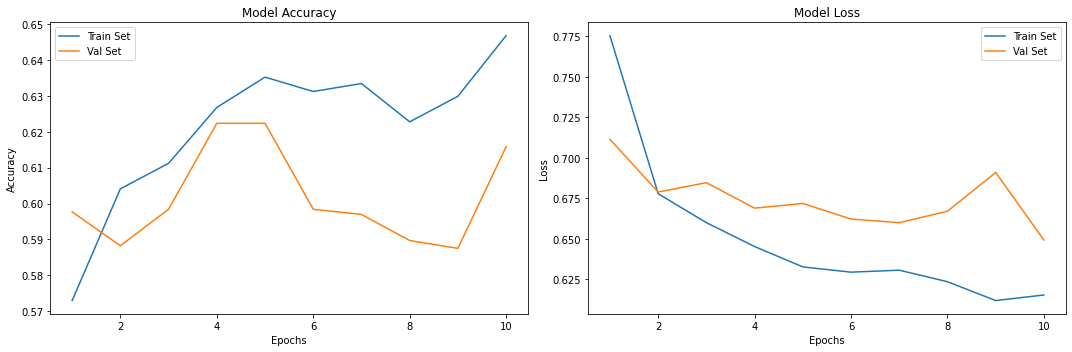

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

31/31 [==============================] - 37s 1s/step


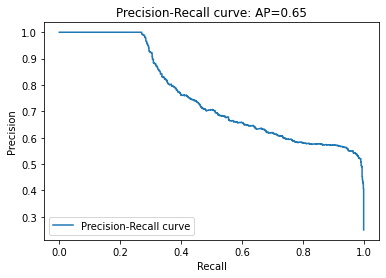

In [ ]:
y_pred = model.predict(test_gen)

y_true = to_categorical(test_gen.classes)

precision, recall, thresholds = precision_recall_curve(y_true.ravel(), y_pred.ravel())

average_precision = average_precision_score(y_true, y_pred, average='weighted')

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc='lower left')
plt.show()

31/31 [==============================] - 34s 1s/step


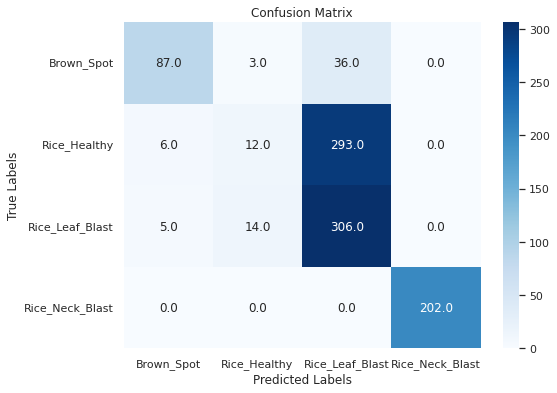



Classification Report:
                  precision    recall  f1-score   support

     Brown_Spot       0.89      0.69      0.78       126
   Rice_Healthy       0.41      0.04      0.07       311
Rice_Leaf_Blast       0.48      0.94      0.64       325
Rice_Neck_Blast       1.00      1.00      1.00       202

       accuracy                           0.63       964
      macro avg       0.70      0.67      0.62       964
   weighted avg       0.62      0.63      0.55       964



In [ ]:
y_pred = model.predict(test_gen)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_gen.classes

class_names = list(test_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

report = classification_report(y_true, y_pred_classes, target_names=class_names)

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\n")
print("Classification Report:\n=================================\n", report)

In [ ]:
model.load_weights('./modelcheck')

class_names = ['Brown_Spot', 'Healthy', 'Leaf_Blast', 'Neck_Blast']
# Load and preprocess the input image
img = cv2.imread('/content/Paddy_Disease/Rice/Rice___Brown_Spot/IMG_20190419_100805.jpg')
img = cv2.resize(img, (224, 224))
img = img.astype("float") / 255.0
img = np.expand_dims(img, axis=0)

# Make predictions on the input image
preds = model.predict(img)
predicted_class = class_names[np.argmax(preds)]

print("Predicted class:", predicted_class)

1/1 [==============================] - 1s 1s/step
Predicted class: Leaf_Blast
